In [14]:
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
log_data = sio.loadmat('/home/desktop/Desktop/22104412_Docs/EEG-COGMusic/Baseline/logs/COH_PLI_PSD_s15_a.mat')

In [16]:
trials = log_data['trials']
predictions = log_data['pred_gt'][:,0,:]
groundtruth = log_data['pred_gt'][:,1,:]

In [17]:
trials

array([[ 0,  1,  2,  3,  9, 15, 20, 21],
       [ 4,  5,  6,  7, 22, 23, 24, 25],
       [ 8, 10, 11, 12, 27, 28, 29, 30],
       [13, 14, 16, 17, 31, 32, 33, 35],
       [18, 19, 26, 34, 36, 37, 38, 39]])

In [18]:
dfs = []
for i in range(predictions.shape[0]):
    x = np.split(predictions[i],8)
    y = np.split(groundtruth[i],8)
    for j in range(len(x)):
        x0 = len(np.argwhere(x[j]==0))
        x1 = len(np.argwhere(x[j]==1))
        y0 = len(np.argwhere(y[j]==0))
        y1 = len(np.argwhere(y[j]==1))
        df_fragment = pd.DataFrame({'trial': str(trials[i][j]), 'x0': [x0], 'y0': [y0], 'x1': [x1],  'y1': [y1]})
        dfs.append(df_fragment)

# Concatenate all DataFrame fragments into a single DataFrame
df = pd.concat(dfs, ignore_index=True)
df.set_index('trial', inplace=True)

In [19]:
df

,x0,y0,x1,y1
trial,,,,
0,17,0,98,115
1,93,115,22,0
2,56,115,59,0
3,97,115,18,0
9,66,0,49,115
15,90,115,25,0
20,14,115,101,0
21,36,115,79,0
4,91,0,24,115


In [20]:
acc = []
t = []
gt = []
for index,row in df.iterrows():
    if row['y0']!=0 and row['y1']!=0:
        acc.append((row['x0']+row['x1'])/(row['y0']+row['y1']))
    if row['y0']!=0:
        acc.append(row['x0']/row['y0'])
        gt.append(0)
    if row['y1']!=0:
        acc.append(row['x1']/row['y1'])
        gt.append(1)
    t.append(str(index))
dfacc = pd.DataFrame({'trial':t,'accuracy':acc})
dfacc.set_index('trial', inplace=True)

In [21]:
# Split DataFrame into groups of 4 rows each
groups_data = [df.iloc[i:i+8] for i in range(0, len(df), 8)]
groups_acc = [dfacc.iloc[i:i+8] for i in range(0,len(dfacc),8)]

In [22]:
dfacc

,accuracy
trial,
0,0.852174
1,0.808696
2,0.486957
3,0.843478
9,0.426087
15,0.782609
20,0.121739
21,0.313043
4,0.208696


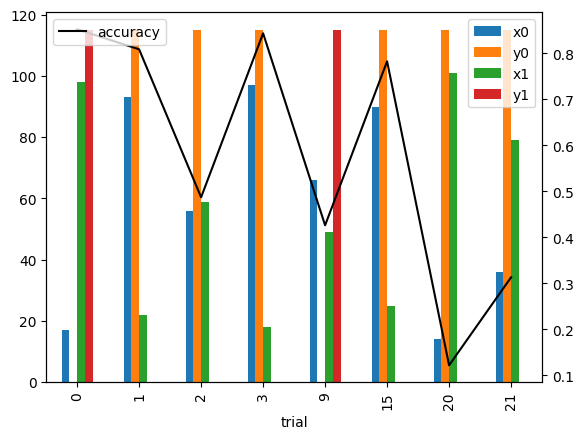

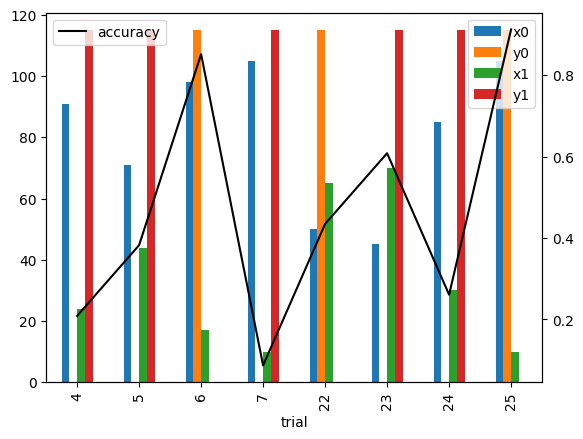

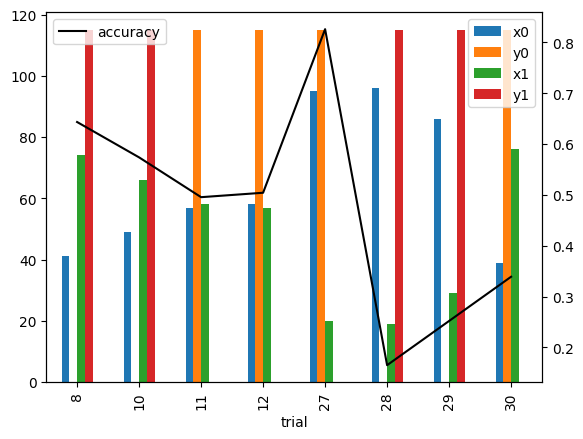

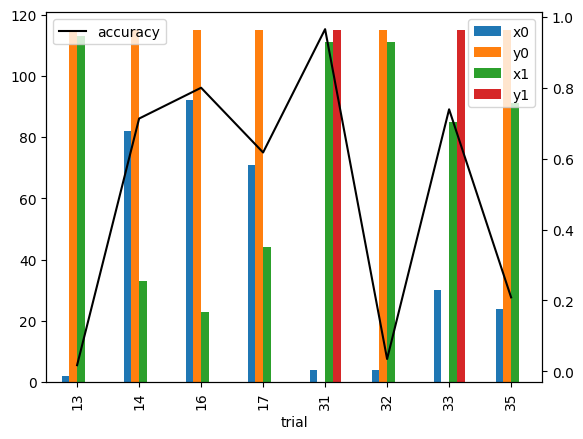

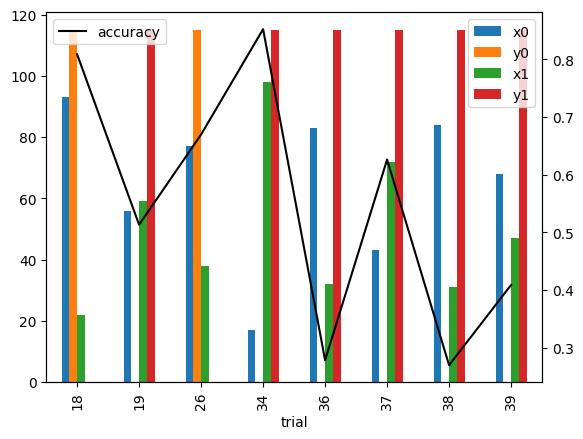

In [23]:
for i in range(len(groups_data)):
    groups = groups_data[i]
    acc = groups_acc[i]
    fix,ax = plt.subplots()
    groups.plot.bar(ax = ax)
    ax1 = plt.twinx(ax)
    acc.plot.line(ax = ax1, color='black')
    ax1.legend(loc='upper left')
    ax.legend(loc = 'upper right')

<Axes: xlabel='trial'>

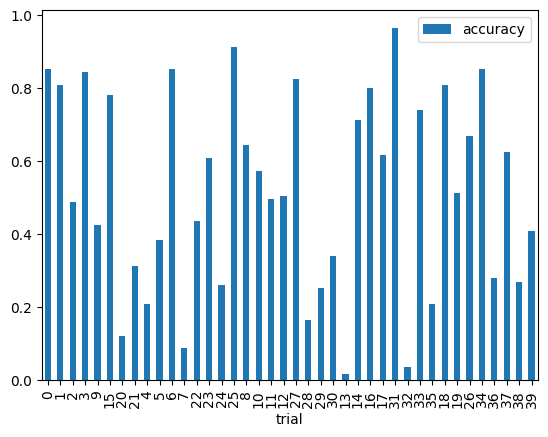

In [24]:
dfacc.plot.bar()

In [25]:
dfacc.where(dfacc['accuracy']>=0.5).count()

accuracy    21
dtype: int64

In [26]:
21/40

0.525